In [14]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"
!pip install nltk --y


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --y


In [15]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from scipy.sparse import dok_matrix
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')
warn()

In [16]:
warn()

In [17]:
# Defining Helper Functions 
# This function will print the class and document dataframe
def print_sample_and_class(data, class_=1,n_samples=5):

    index=data[data['y']==class_]['X'].index[0:n_samples]

    for i in index:
        print("sample {} of class {}".format(i,class_))
        print(data[data['y']==class_]['X'][i])

In [18]:
df=  pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/train.txt",header=None, sep="\\|\\|\\|",names=['y','X'])
df.head()

,y,X
0,1,The Rock is destined to be the 21st Century '...
1,1,The gorgeously elaborate continuation of `` T...
2,1,Singer\/composer Bryan Adams contributes a sl...
3,0,You 'd think by now America would have had en...
4,1,Yet the act is still charming here .


In [19]:
print_sample_and_class(df, class_=1,n_samples=5)

sample 0 of class 1
 The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .
sample 1 of class 1
 The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .
sample 2 of class 1
 Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .
sample 4 of class 1
 Yet the act is still charming here .
sample 5 of class 1
 Whether or not you 're enlightened by any of Derrida 's lectures on `` the other '' and `` the self , '' Derrida is an undeniably fascinating and playful fellow .


In [20]:
my_string=df['X'][0]
print("document:",my_string)
print("\n type:",type(my_string))

document:  The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .

 type: <class 'str'>


In [21]:
my_string[0:10]

' The Rock '

In [22]:
# We can split the string into a individual of words, each word is called a token
my_string.split()

['The',
 'Rock',
 'is',
 'destined',
 'to',
 'be',
 'the',
 '21st',
 'Century',
 "'s",
 'new',
 '``',
 'Conan',
 "''",
 'and',
 'that',
 'he',
 "'s",
 'going',
 'to',
 'make',
 'a',
 'splash',
 'even',
 'greater',
 'than',
 'Arnold',
 'Schwarzenegger',
 ',',
 'Jean-Claud',
 'Van',
 'Damme',
 'or',
 'Steven',
 'Segal',
 '.']

In [23]:
# In python, we can apply different string operations like converting each character to lowercase:
my_string.casefold()

" the rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal ."

In [24]:
# We can apply this operation to every column by using .str attribute followed by the string operations 
# we would like to perform.
df["X"].str.casefold()

0        the rock is destined to be the 21st century '...
1        the gorgeously elaborate continuation of `` t...
2        singer\/composer bryan adams contributes a sl...
3        you 'd think by now america would have had en...
4                    yet the act is still charming here .
                              ...                        
8539                                      a real snooze .
8540                                       no surprises .
8541     we 've seen the hippie-turned-yuppie plot bef...
8542     her fans walked out muttering words like `` h...
8543                                  in this case zero .
Name: X, Length: 8544, dtype: object

In [25]:
# Here we have a list of positive and negative words :
 # Count the number of "good words" and "bad words" in the text
good_words = ['love', 'good','excellent', 'great','charming']


bad_words = ['hate', 'bad','brutal', 'damnable', 'deplorable', 'detestable', 'disastrous', 'dreadful']

In [26]:
# We assign a 1 to the positive sentiment word and a -1  to all the negative sentiment words, then calculate the
# total for each document and place it in the column score:
df["score"] = 0
for bad_word in bad_words:
    df["score"]-= df["X"].str.casefold().str.count(bad_word)

In [27]:
for good_words in good_words:
    df["score"]+=df["X"].str.casefold().str.count(good_words)

In [28]:
# We are giving each word a score, one for a positive sentiment word and a negative one for negative sentiment word.
df.head()

,y,X,score
0,1,The Rock is destined to be the 21st Century '...,1
1,1,The gorgeously elaborate continuation of `` T...,0
2,1,Singer\/composer Bryan Adams contributes a sl...,0
3,0,You 'd think by now America would have had en...,0
4,1,Yet the act is still charming here .,1


In [29]:
# we can print out the document with the highest score:
df.loc[df["score"].argmax(axis=0),'X']

' Good fun , good action , good acting , good dialogue , good pace , good cinematography .'

In [30]:
# we can also print out the document with the lowest score:
df.loc[df["score"].argmin(axis=0),'X']

' It is that rare combination of bad writing , bad direction and bad acting -- the trifecta of badness .'

In [31]:
# We calculate the score for positive and negative and neural classes
df.groupby('y').mean()

,score
y,
-1,0.003021
0,0.057882
1,0.106094


y
-1    AxesSubplot(0.125,0.11;0.775x0.77)
 0    AxesSubplot(0.125,0.11;0.775x0.77)
 1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: score, dtype: object

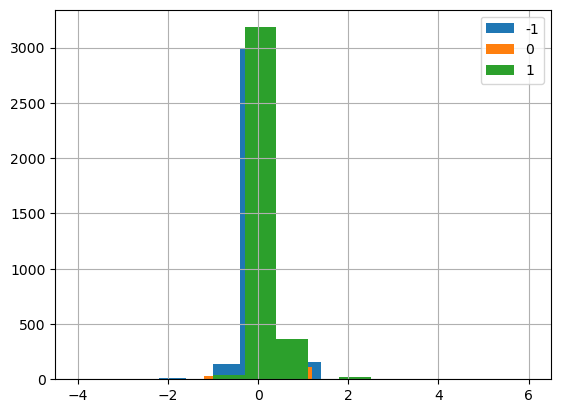

In [32]:
# we see that the scores are relatively the same. We can also plot a histogram we see for each class most of the 
# samples overlap.
df[["score","y"]].groupby('y')["score"].hist(legend=True)

In [33]:
# We create a new column yhat for the sentiment we will assign each sample to a neutral sentiment:
df['yhat']=0

In [34]:
# We can set rule-based thresholds if the score is less than the threshold; we set the sentiment to positive
# sentiment; similarly, if it's less than the negative of the threshold, we set the sentiment to negative. 
# Anything between we set to neutral. In this case, the threshold is one; you can try different values for
# thresholds or different rules on your own ;

negative_label = df[['score']].sum(axis=1) < 1
pos_label = df[['score']].sum(axis=1) > -1

In [35]:
# We assign the class according the the score:
df['yhat'][negative_label] = -1
df['yhat'][pos_label] = 1

In [36]:
df['y'].value_counts()

 1    3610
-1    3310
 0    1624
Name: y, dtype: int64

In [37]:
# We compare the predicted sentiment with the actual sentiment, we see the accuracy is not good
np.mean(df['yhat']==df['y'])

0.43562734082397003

In [38]:
# There are many reasons why the rule based classifier did not work. The list of words was small the datasets can 
# have thousands of words both positive and negative words; also we dint have any neutral words. Are scoring methods
# we use gives a one for a positive sentiment word and a negative one for negative sentiment word, maybe some words
# should be grater then one for positive sentiment like "amazing" should be 10 and ok should be 4, similarly some 
# words with negative sentiment should have large negative values like "barfed " should be "-10" and "boring" should
# be -4. Maybe neutral and negative words may have a score for positive sentiment and vise versa. One way to answer
# these questions is to use machine learning to determine these these scores.

# Machine Learning
# Machine Learning (ML) is a standard tool for NLP tasks. There are many machine learning methods, and in addition,
# there are many machine learning methods specially built for NLP tasks. We will use multi-class logistic regression
# via scikit-learn , a more general approach. We will for two reasons ; first, if you have any experience in
# Machine learning, you probably have experience with logistic regression, second logistic regression can be 
# interpreted as a kind of scoring. The parameters in this case the scores are obtained via training or learning,
# we try different scores called weights for each word until we minimize the miss classified samples. This is done
# in an optimal way. It turns out that ML can classify NLP data so well we have to test our method using data we
# haven seen, we actually have to test it twice on data it has not see, the datasets form

# Training data set A training data set is a data set of examples used during the learning process and is used to 
# fit the parameters (e.g., weights or scores )

# Validation data set A validation data set is a data-set of examples used to tune the hyperparameters these are
# related to the learning training and are chose by experimenting

# Test data set A test data set is a data set that is independent of the training data set and Validation , it 
# basicly how good you model should do in the real world

In [39]:
train_dataset=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/train.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 
validation_dataset=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/dev.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 
test_dataset =pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/test.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 

In [40]:
# Features
# Machines, different from humans, cannot comprehend raw text. Therefore, we have got to transform our content into 
# numbers we denote features for  𝑛−𝑡ℎ document with the feature vector  𝐱𝑛
#  . The  𝑖−𝑡ℎ
#   word would be the i-th element in  𝐱𝑛
#   denoted by  𝑥𝑖
#   we drop the  𝑛
#   for simplicity. The dataset would be the matrix  𝐗
#   where each row corresponds to a document and each column corresponds to a word .Lets see how to transform 
# documents into corresponding numerical features:

In [41]:
# Bag-Of-Words
# A bag-Of-Words (BoW) model transforms text into fixed-length vectors; for example, 
# a count if the number of times the word is present in a document or token counts. 
# Scikit-learn's ```CountVectorizer```  is one method to perform BoW transformation; it converts a set of
# text documents to a matrix of token counts called a document-term matrix (TDM). 
# The TDM is a sparse matrix object   ```scipy.sparse.csr_matrix```; where each row represents a different document,
# and each column represents each word in the document. For each  element in the matrix, represent how many times
# that word occurs. First we import  ```CountVectorizer``` object:

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
 corpus = [
    'This is the first of document .',
    'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?' ]

In [44]:
# we apply the CountVectorizer object,the output is the TDM a sparse matrix object:
vectorizer = CountVectorizer()

X_toy = vectorizer.fit_transform(corpus)
X_toy

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [45]:
# we can output the word corresponding to each column
vectorizer. get_feature_names()

['and',
 'document',
 'first',
 'is',
 'of',
 'one',
 'second',
 'the',
 'third',
 'this']

In [46]:
# we can cast the output to a numpy array 
X_toy.toarray()

array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1]])

In [47]:
# we can convert the output to a datafame. We see the word corresponding to each column and the phrase for each row.
original_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names(),index=corpus )
original_toy_df

,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0,1,1,1,1,0,0,1,0,1
This document is the second document.,0,2,0,1,0,0,1,1,0,1
And this is the third one.,1,0,0,1,0,1,0,1,1,1
Is this the first document?,0,1,1,1,0,0,0,1,0,1


In [48]:
# For the first document 'This is the first of document .' would have the featuer  𝐱1=[0,1,1,1,1,0,0,1,0,1]
#  , the second document would be  𝐱2=[0,2,0,1,0,0,1,1,0,1]
#   and do on

# Training a Model with Grid Search and Logistic Regression¶
# In this section, let's train a model with Grid Serch and Logistic Regression first we import the class 
# constructors, you will do a much more simple example in Question 2 where you use default settings of
# Logistic Regression.
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression

# The data is pre-split into training and validation data. As we want to determine hyperparameters automatically
# using  ```GridSearchCV``` we need to combine the datasets together

In [49]:
dataset=pd.concat([train_dataset,validation_dataset],axis=0)

In [50]:
# We can keep track of what samples belong to training a validation by creating a NumPy array where negative 
# ones correspond to training samples, and zeros correspond to validation data. We then use a predefined scheme 
# using PredefinedSplit. 
from sklearn.model_selection import PredefinedSplit

split_index = [-1]*train_dataset.shape[0] + [0]*validation_dataset.shape[0]
pds = PredefinedSplit(test_fold = split_index)

In [52]:
# we create a CountVectorizer() object and transform the dataset:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['X'])
y = dataset['y']

In [54]:
# we do the same for the test dataset
X_test = vectorizer.transform(test_dataset['X'])
y_test = test_dataset[['y']]

In [55]:
# We create a dictionary of hyperparameters, the Inverse of regularization strength; and the norm of the penalty. 
# We assume L1 would be better as the data is sparse:
param_grid = {'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 20)}

In [56]:
#  We create a GridSearchCV object , with a logistic regression estimator, the parameter cv 
# Determines the cross-validation splitting strategy, we use the predefined split. Finely we use the the 
# parameter grid defined above:
clf = GridSearchCV(estimator = LogisticRegression(),cv=pds,param_grid=param_grid)
clf

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [57]:
# We fit the model and print out the highest accuracy in the validation data and the corresponding best parameter:
clf.fit(X, y)
print("highest accuracy in the validation accuracy ",clf.best_score_)
print("best hyperparameters:",clf.best_params_)


highest accuracy in the validation accuracy  0.6194368755676658
best hyperparameters: {'C': 0.23357214690901212, 'penalty': 'l2'}


In [58]:
# We also find the accuracy using the test data we see it's much higher than the validation data:
print(" best parameters accuracy score :",clf.score(X_test,y_test))

 best parameters accuracy score : 0.6497737556561086


In [59]:
model=clf.best_estimator_

In [60]:
model.predict(X_test)

array([ 0,  1,  1, ...,  1, -1, -1])

In [ ]:
# each sample corresponds the predicted class or predicted sentiment.

# It turns out the logistic regression is calculating the score using parameters  𝑤𝑖𝑗
#   for the  𝑗
#   class

# 𝑠𝑗=∑𝑁𝑖=1𝑤𝑖𝑗𝑥𝑖
 
# The larger  𝑠𝑗
#  , the higher the score, and the more likely the sample belongs to that class. As  𝑥𝑖
#   is usually one, a significant  𝑤𝑖𝑗
#   means that word is more likely to contribute to that class; if  𝑤𝑖𝑗
#   is negative, the more likely that word is not to belong to that class.

# We can determine the words with the largest parameters or score, for each class  𝑗
#   we sort the index of each parameter  𝑤𝑖𝑗
#   from largest to smallest

In [62]:
feature_importance = np.argsort(model.coef_)

In [64]:
# We find the corresponding vector  𝑥𝑖
#   and then using get_feature_names_out() to find the word with the highest score
for class_ in range(3):
    
    print("(j) or y=",class_)
    print(np.array(vectorizer.get_feature_names())[feature_importance[class_,0:10]])

(j) or y= 0
['solid' 'powerful' 'enjoyable' 'best' 'hilarious' 'fun' 'perfectly'
 'charming' 'always' 'human']
(j) or y= 1
['offers' 'screen' 'imagine' 'thoroughly' 'crafted' 'impressive' 'going'
 'frequently' 'watching' 'four']
(j) or y= 2
['suffers' 'dull' 'worst' 'mess' 'too' 'unfortunately' 'lack' 'less'
 'plain' 'bad']


In [66]:
# Question 1 Create you own CountVectorizer function

# Question 1 a) Create a function that takes the input column of a dataframe train_dataset["X"] .
# The output is a dictionary where each key is a word in the corpus, and the value is a unique digit, 
# then apply the function and call the output word_to_idx
def build_feature_map(X):

    word_types =set()
    #Split string into words usig split() then apply(set) 
    for x in X.str.casefold().str.split().apply(set):
 
    
        word_types=word_types.union(x)
    
    # Create a dictionary keyed by word mapping it to an index
    return   {word: idx for idx, word in enumerate(word_types)}

word_to_idx = build_feature_map(train_dataset["X"])

In [67]:
# you can use the following to map the index to the key and the word to the value idx_to_word_func =
# lambda word_to_idx :{v:k for k,v in word_to_idx.items()}

# Question 1 b) write a function that outputs a TDM given train_dataset["X"] you can use word_to_idx as an 
# input, apply the function to train_dataset["X"] call the result X_train:
def extract_features(word_to_idx, X):
    D=len(word_to_idx)
    N=X.shape[0]
    words=set(word_to_idx.keys())
    
    features = dok_matrix((N, D))
    for row,x in enumerate(X[0:]):
        for word in x.split():
            if word in words:
                features[row,word_to_idx[word.casefold()]]+=1
    return features

X_train= extract_features(word_to_idx, train_dataset["X"])

In [68]:
# Question 2 Create a logistic regression object and train it using the training data. 
# Calculate the score using the validation data and test data
X_train= extract_features(word_to_idx, train_dataset["X"])
y_train=train_dataset[["y"]]

X_val=extract_features(word_to_idx, validation_dataset["X"])
y_val=validation_dataset[['y']]
X_test=extract_features(word_to_idx, test_dataset["X"])
y_test=test_dataset[['y']]
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("validation accuracy ",lr.score(X_val,y_val))
print("test accuracy ",lr.score(X_test,y_test))

validation accuracy  0.5912806539509536
test accuracy  0.6339366515837104


In [72]:
# Bag-Of-Word Hyperparameters¶
# Bag-Of-Word has several hyperparameters you can change to improve performance; most have to do with 
# reducing the number of dimensions in the TDM this improves performance, lets review some
# Stop words

# Stop words, which include "and," "the," and "his," are seen to be uninformative in describing the content of a
# document and may be eliminated sometimes to improve performance. However, removing stop words does not always 
# help with performance, so the validation data should be used to determine their effectiveness. A list of stop words
# are available using Natural Language Toolkit (nltk) we can download the list of stop words as follows:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lawrence/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
# We specify the languish as English. The result is a list of stop words; we can print out the first ten:
print(stopwords.words('english')[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [75]:
# we can use the toy data example, we add the list of stop words to the parameter stop_words and transform the data:
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_toy = vectorizer.fit_transform(corpus)

In [ ]:
# We can compare the TDM with the original TDM with no stop words we see the columns corresponding to and, 
# the and this are missing: